# Problem Statement 1:


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Importing data


In [30]:
df = pd.read_csv("C:\\Users\\siddh\\New folder\\car.csv")

In [31]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [24]:
df.shape

(416, 9)

In [ ]:
# Finding Null value

In [26]:
df.isnull().sum()

Unnamed: 0    115
Unnamed: 1    108
Unnamed: 2    111
Unnamed: 3    114
Unnamed: 4    114
Unnamed: 5    114
Unnamed: 6    114
Unnamed: 7    115
Unnamed: 8    115
dtype: int64

In [ ]:
# Plotting selling price over the period of time.

<Figure size 1000x1000 with 0 Axes>

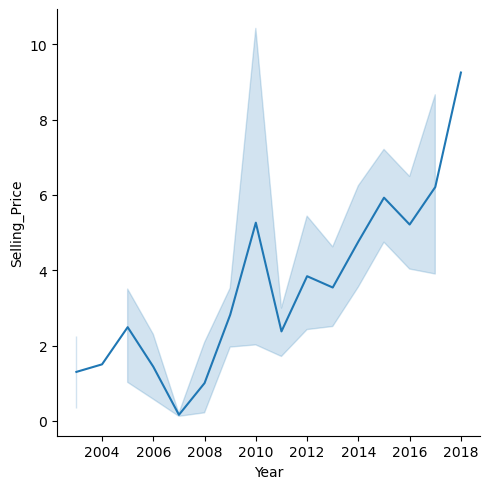

In [37]:
fig=plt.figure(figsize=(10,10))
sns.relplot('Year','Selling_Price',data=df,kind='line')

In [38]:
df['Selling_Price'].describe()

count    301.000000
mean       4.661296
std        5.082812
min        0.100000
25%        0.900000
50%        3.600000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64

C:\Users\siddh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


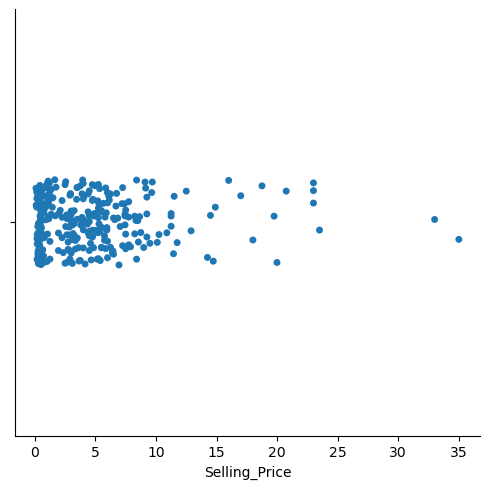

In [39]:
sns.catplot('Selling_Price',data=df)

<AxesSubplot:xlabel='Year', ylabel='count'>

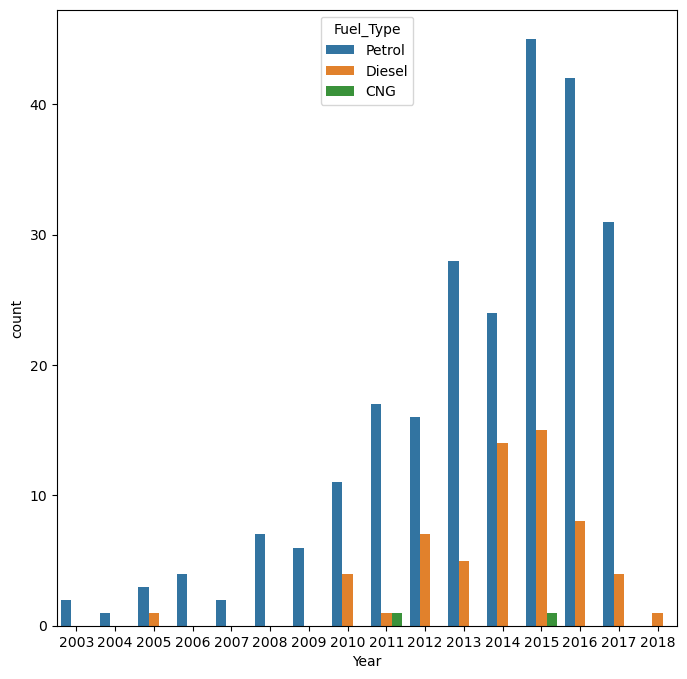

In [43]:
plt.figure(figsize=(8,8))
sns.countplot('Year',hue='Fuel_Type',data=df)

In [ ]:
# here we can see petrol cars and bike are more for selling than diesel and CNG cars and bike in every

C:\Users\siddh\anaconda3\lib\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\siddh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 800x800 with 0 Axes>

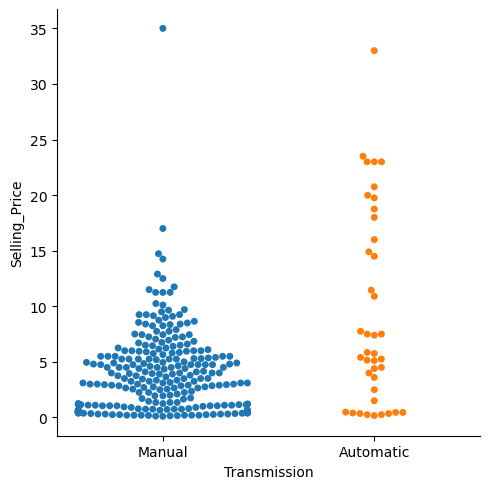

In [44]:
plt.figure(figsize=(8,8))
sns.catplot(data=df,kind='swarm',x='Transmission', y='Selling_Price',split=True)

<AxesSubplot:xlabel='Selling_Price', ylabel='Kms_Driven'>

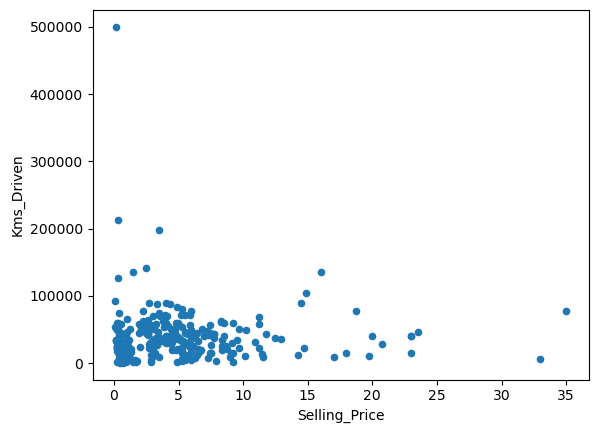

In [40]:
df.plot.scatter('Selling_Price','Kms_Driven')

# Checking the selling price is affected to kilometer driven

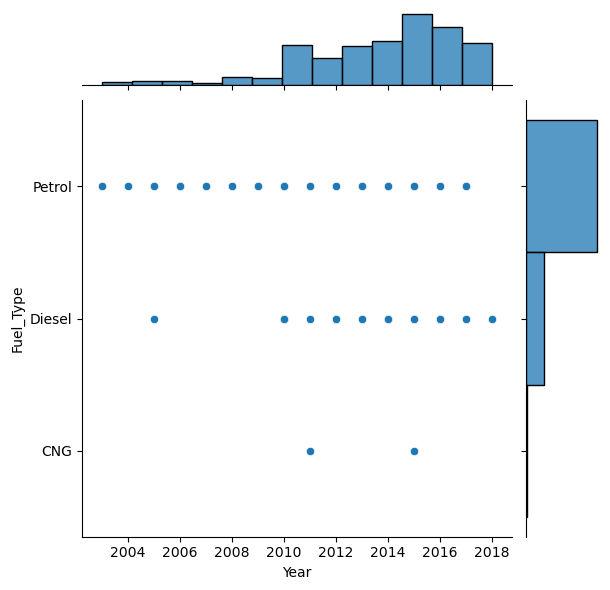

In [46]:
sns.jointplot(data=df,x="Year",y="Fuel_Type")

<AxesSubplot:xlabel='Selling_Price', ylabel='Seller_Type'>

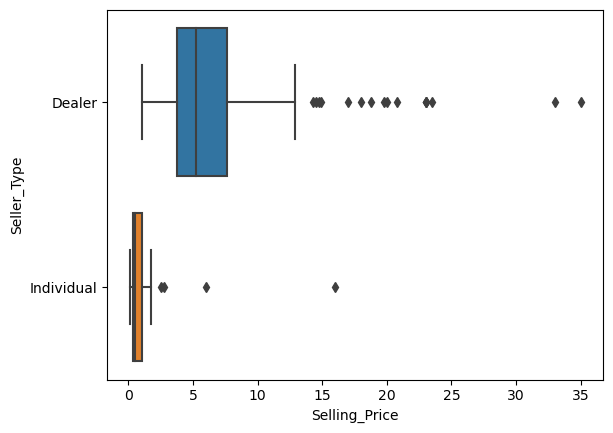

In [47]:
sns.boxplot(data=df,x='Selling_Price',y='Seller_Type')

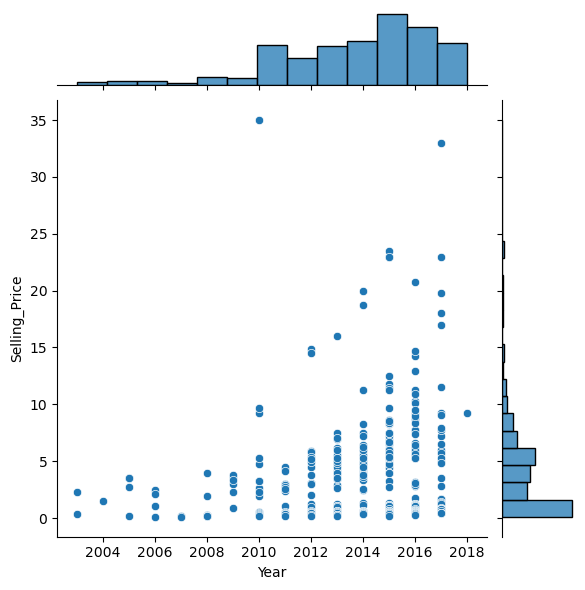

In [48]:
sns.jointplot(data=df,x="Year",y="Selling_Price")

In [ ]:
# Dropping Car name column because it has numbers of unique columns

In [50]:
df.drop('Car_Name',axis=1,inplace=True)
df.head(2)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [ ]:
#converting Year column into numbers of years selling

In [51]:
df['curr_Year']=2020
df['Years']=df.curr_Year - df.Year
df.drop(['Year','curr_Year'],axis=1,inplace=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [ ]:
#listing down how many categorical columns we have and how many unique values they consist

In [52]:
categorical_columns=df.select_dtypes(include='object')
for i in categorical_columns:
    print('column name {} -> {} : {}'.format(i,df[i].nunique(),df[i].unique()))

column name Fuel_Type -> 3 : ['Petrol' 'Diesel' 'CNG']
column name Seller_Type -> 2 : ['Dealer' 'Individual']
column name Transmission -> 2 : ['Manual' 'Automatic']


In [53]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


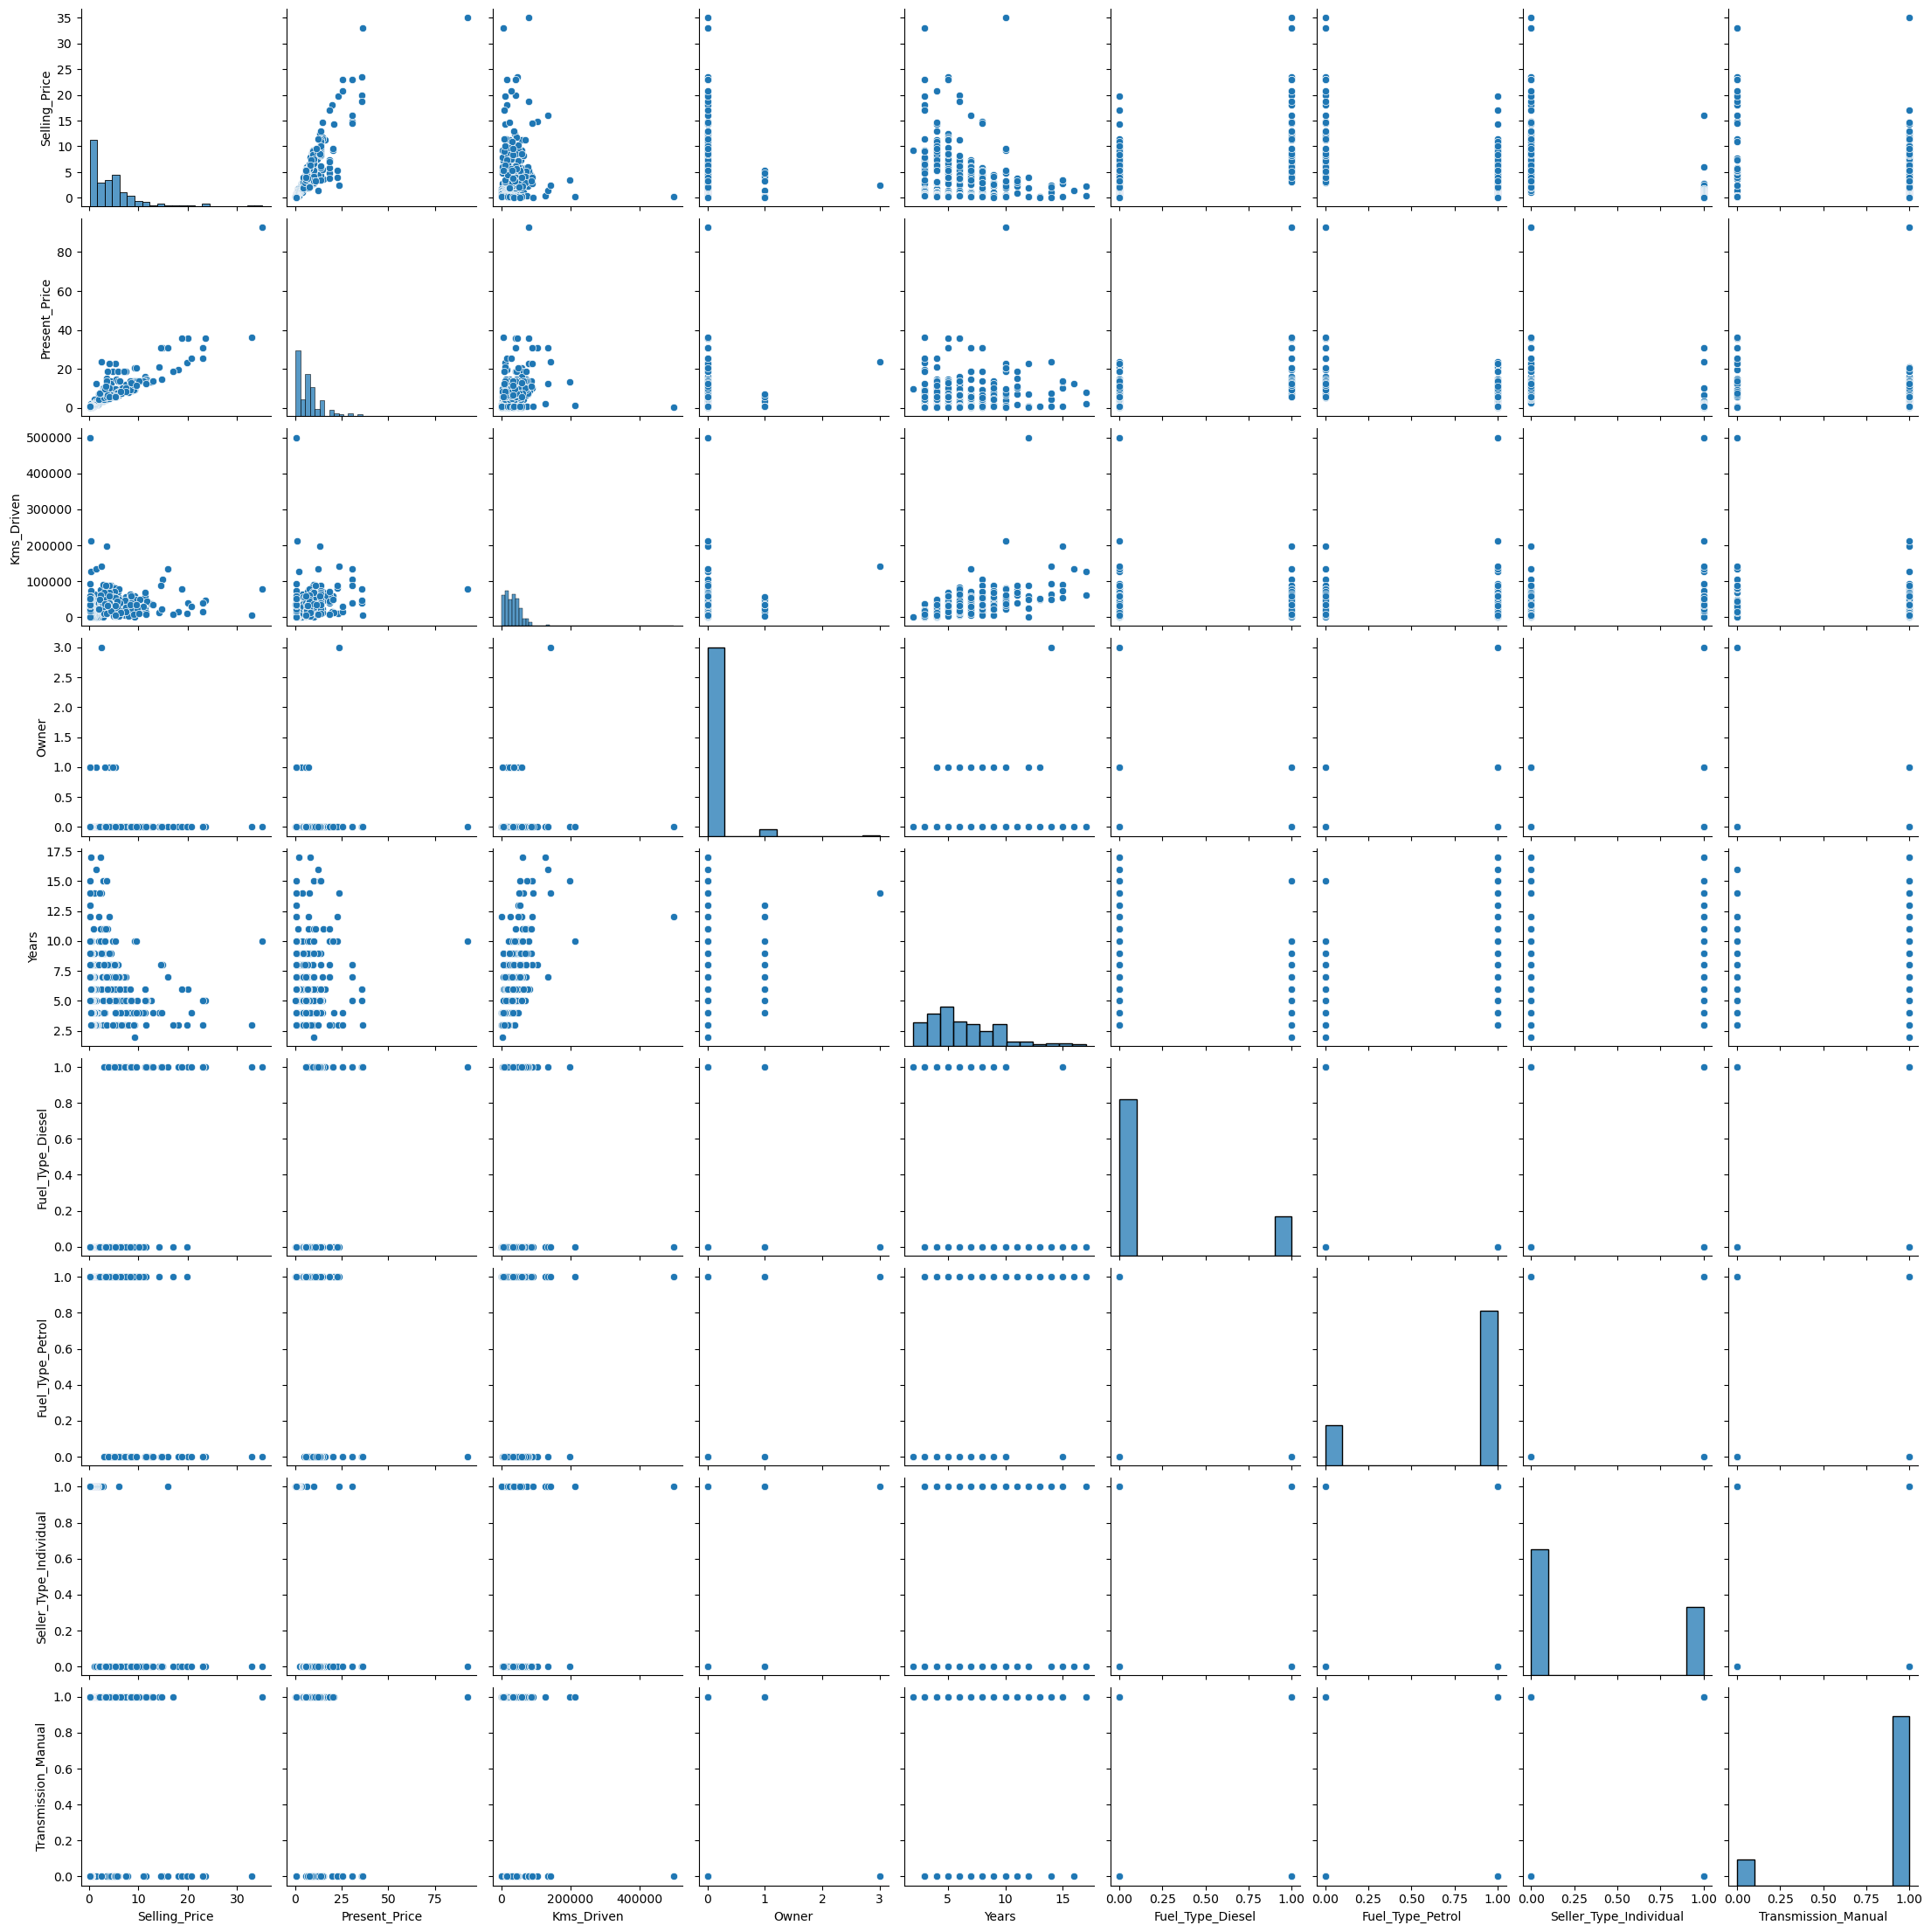

In [55]:
sns.pairplot(data=df)

<AxesSubplot:>

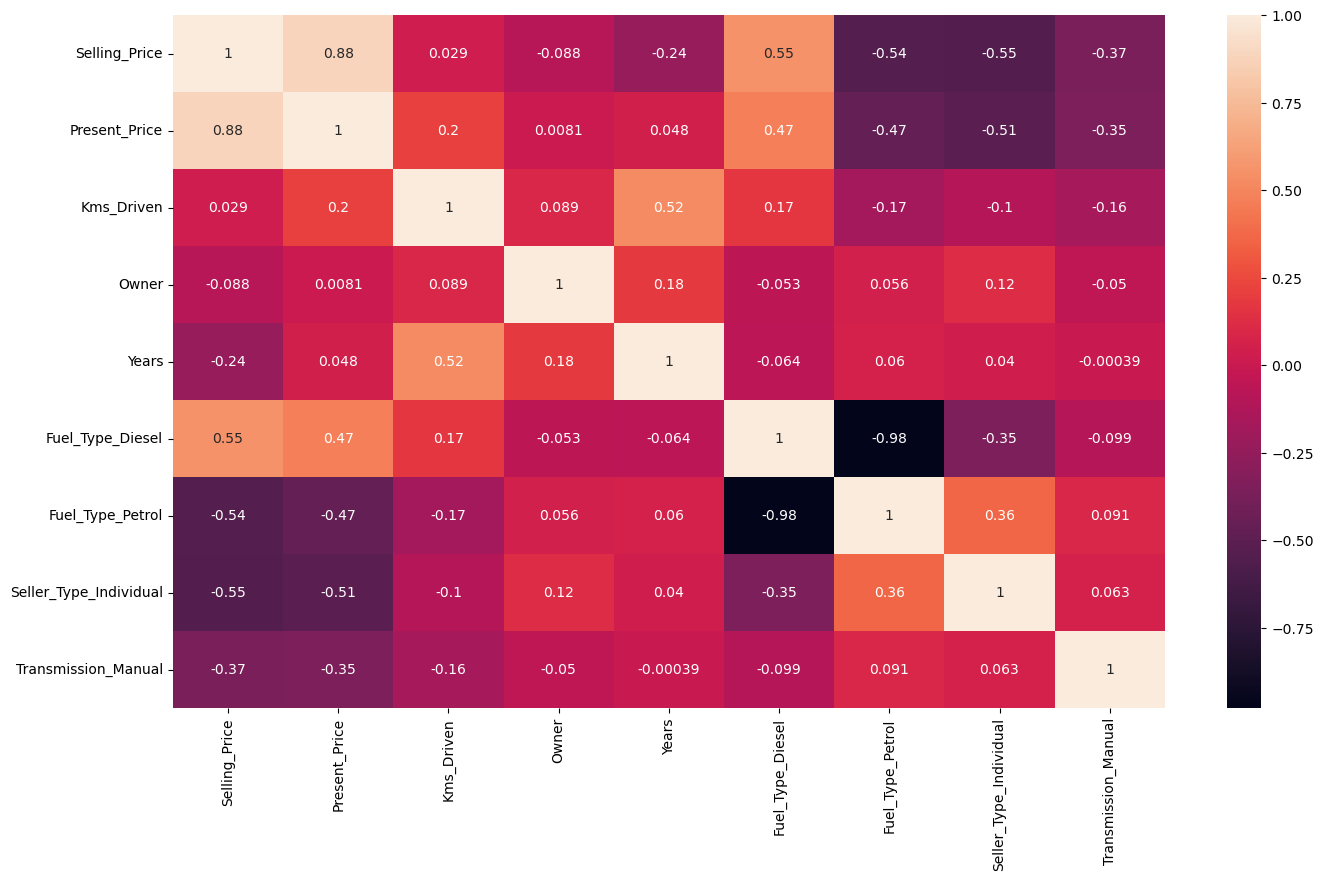

In [58]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True)

In [59]:
x=df.drop('Selling_Price',axis=1)
y=df['Selling_Price']

In [60]:
print(x.shape)
print(y.shape)

(301, 8)
(301,)


In [ ]:
# plotting graph for correlation between dependent and independent column

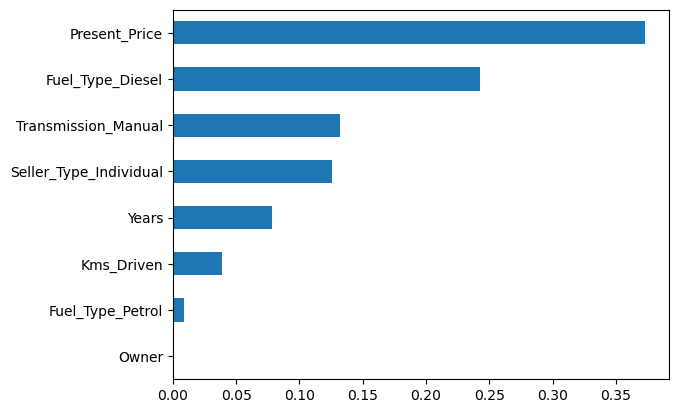

In [62]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)
feat_imp=pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=True)
feat_imp.plot(kind='barh')
plt.show()

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [65]:
print(x_train[0])
print(x_test[0])

[0.00465973 0.05105105 0.33333333 0.64285714 0.         1.
 1.         1.        ]
[0.00270915 0.04704705 0.         0.07142857 0.         1.
 1.         0.        ]


In [ ]:
# Logistic Regression

In [67]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8489813024899066

In [69]:
from sklearn.svm import SVR
model=SVR()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6970730951191092

In [70]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9457971886268759

In [72]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9634748718097481

In [73]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [74]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)
rf = RandomForestRegressor()

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [75]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [76]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [77]:
predictions=rf_random.predict(x_test)

C:\Users\siddh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

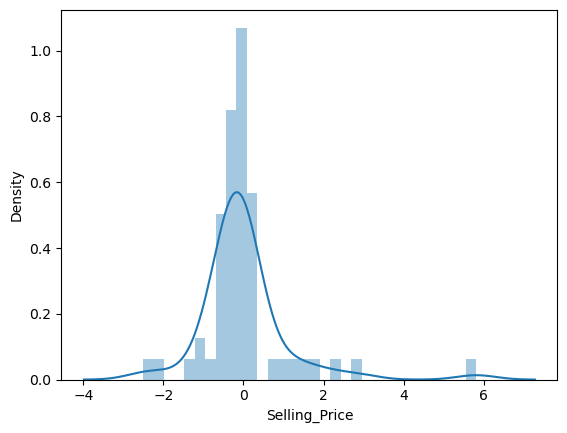

In [78]:
sns.distplot(y_test-predictions)

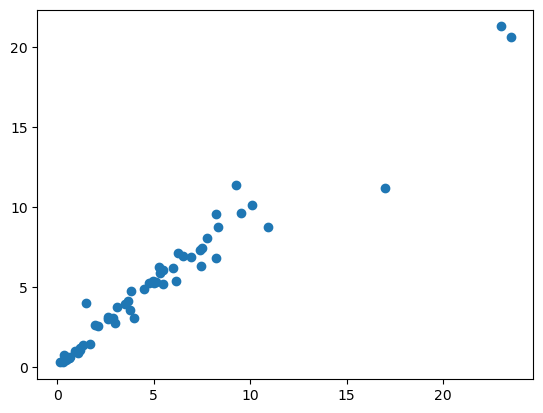

In [79]:
plt.scatter(y_test,predictions)